In [77]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from Utils.Gas_Storage_Env import GasStorageEnv
import numpy as np
import os
import matplotlib.pyplot as plt
from stable_baselines3 import PPO, DDPG, TD3, A2C, SAC, DQN
from Train import run_test
from Utils.Plots import plot_sigma_robustness,plot_sigma_robustness_single

import pandas as pd

# **ASSESSING ROBUSTNESS FOR DIFFERENT SIGMAS**

In [78]:
# 1) Test sigma values
sigma_s = [0.035, 0.04, 0.045, 0.05, 0.055, 0.06,0.065,0.07]

# 2) Metrics
ep_metric_keys = [
 "bank account",  "market","price", "november inventory"
]

# 3) Episodes and steps
n_episodes     = 200
max_test_steps = 360

## *BASELINE MODEL (NO PENALTY TRESHOLD)*

In [79]:
 #load model 
model = SAC.load("/home/tizianobacaloni/GasRL/Models/sac_model_1500000_pen1000.0_pen_thresh0.0_rep4/sac_model_1500000_pen1000.0_pen_thresh0.0_rep4.zip")
import os
print("Working dir:", os.getcwd())


Working dir: /home/tizianobacaloni/GasRL/Plots


In [80]:
cumulative = [ "market","bank account"]
# 1) Accumulators
sigma_vals = []
means_dict = {k: [] for k in ep_metric_keys}
cis_dict   = {k: [] for k in ep_metric_keys}

# 2) For each sigma, compute the mean of each metric  
for sigma in sigma_s:
    tmp_mean, tmp_ci, _, _ = run_test(model, n_episodes, max_test_steps, ep_metric_keys, sigma=sigma)
    sigma_vals.append(sigma)
    
    for key in ep_metric_keys:
        if key in  cumulative:
            means_dict[key].append(((tmp_mean[key])[0][-1]))  # Each key of the dict is a 2-element list: 1st is an array of length  max_test_step in which each value is the mean across  n_reps repetitions for that step
            cis_dict[key].append(((tmp_ci[key][0][-1])))      # Since these variables are cumulative,  only take the last element of the list
                                                              # Taking[0] alows to acess 1st element of the list, which is the array above
        else:  #####MEAN OF THE MEAN ACROSS REPETITION
            means_dict[key].append(np.nanmean(tmp_mean[key])) # Computing mean over the array of lenght max_test_step instead taking the last element
            cis_dict[key].append(np.nanmean(tmp_ci[key]))     

# 3) Sving folder
save_root = "Sigma_without_pen_thresh"
os.makedirs(save_root, exist_ok=True)

# 4) Database  to be saved for faster plotting
np.save(os.path.join(save_root, "means_dict.npy"), means_dict)
np.save(os.path.join(save_root, "cis_dict.npy"),   cis_dict)



Test completed with 200 repetitions
Test completed with 200 repetitions
Test completed with 200 repetitions
Test completed with 200 repetitions
Test completed with 200 repetitions
Test completed with 200 repetitions
Test completed with 200 repetitions
Test completed with 200 repetitions


In [81]:
means_dict = np.load("Sigma_without_pen_thresh/means_dict.npy", allow_pickle=True)
cis_dict = np.load("Sigma_without_pen_thresh/cis_dict.npy", allow_pickle=True)

## *MODEL WITH PENALTY TRESHOLD*

In [82]:
model = SAC.load("/home/tizianobacaloni/GasRL/Models/sac_model_1500000_pen1000.0_pen_thresh1000.0_rep1/sac_model_1500000_pen1000.0_pen_thresh1000.0_rep1.zip")

In [83]:
cumulative = [ "market","bank account"]
# 1) Accumulators
sigma_vals = []
means_dict = {k: [] for k in ep_metric_keys}
cis_dict   = {k: [] for k in ep_metric_keys}

# 2) For each sigma,compute the mean of each metric
for sigma in sigma_s:
    tmp_mean, tmp_ci, _, _ = run_test(model, n_episodes, max_test_steps, ep_metric_keys, sigma=sigma)
    sigma_vals.append(sigma)
    
    for key in ep_metric_keys:
        if key in  cumulative:
            means_dict[key].append(((tmp_mean[key])[0][-1]))  # Each key of the dict is a 2-element list: 1st is an array of length  max_test_step in which each value is the mean across  n_reps repetitions for that step
            cis_dict[key].append(((tmp_ci[key][0][-1])))      # Since these variables are cumulative,  only take the last element of the list
                                                              # Taking[0] alows to acess 1st element of the list, which is the array above
        else:
            means_dict[key].append(np.nanmean(tmp_mean[key])) # Computing mean over the array of lenght max_test_step instead taking the last element
            cis_dict[key].append(np.nanmean(tmp_ci[key]))     

# 3) Saving folder
save_root = "Sigma_pen_thresh"
os.makedirs(save_root, exist_ok=True)

# 4) Database to be saved for faster plotting
np.save(os.path.join(save_root, "means_dict.npy"), means_dict)
np.save(os.path.join(save_root, "cis_dict.npy"),   cis_dict)
 

Test completed with 200 repetitions
Test completed with 200 repetitions
Test completed with 200 repetitions
Test completed with 200 repetitions
Test completed with 200 repetitions
Test completed with 200 repetitions
Test completed with 200 repetitions
Test completed with 200 repetitions


In [84]:
means_dict = np.load("Sigma_pen_thresh/means_dict.npy", allow_pickle=True)
cis_dict = np.load("Sigma_pen_thresh/cis_dict.npy", allow_pickle=True)

In [85]:
FIGSIZE=(3,3)

## ***ROBUSTNESS COMPARISON***


##### *Price values are defined as: mean of price series, with lenght=max_test_step, in which each value t is the mean across n_reps*

In [86]:
# Loading data for both models and selecting just keys of interest
means_dict_1 = np.load("Sigma_without_pen_thresh/means_dict.npy", allow_pickle=True).item()
means_dict_2 = np.load("Sigma_pen_thresh/means_dict.npy", allow_pickle=True).item()
cis_dict_1 = np.load("Sigma_without_pen_thresh/cis_dict.npy", allow_pickle=True).item()
cis_dict_2 = np.load("Sigma_pen_thresh/cis_dict.npy", allow_pickle=True).item()


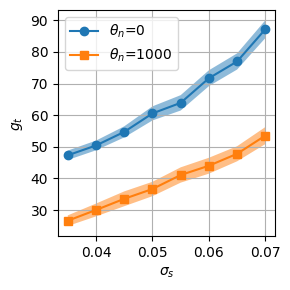

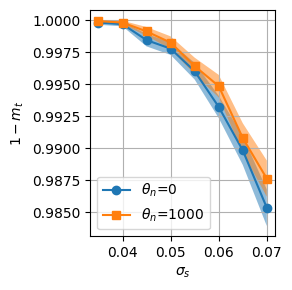

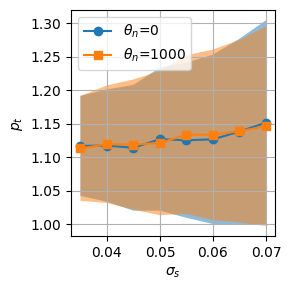

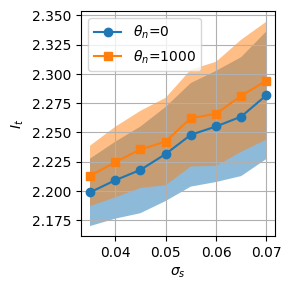

In [87]:

#Plotting the metrics for both models
for key in means_dict_1.keys():
    metric_data_1 = means_dict_1[key]
    metric_data_2 = means_dict_2[key]
    metric_1_ci = cis_dict_1[key]
    metric_2_ci = cis_dict_2[key]

    plt.figure(figsize=FIGSIZE)

    # Dividing both market success (1-m_t) and bank account (g_t) by 360 
    if key in ["bank_account","market"]:
        plt.plot(sigma_s, np.array(metric_data_1) / 360, marker='o', label=r"$\theta_n$=0") # No penalty threshold
        plt.fill_between(sigma_s, 
                        (np.array(metric_data_1) - np.array(metric_1_ci)) / 360, 
                        (np.array(metric_data_1) + np.array(metric_1_ci)) / 360, 
                        alpha=0.5)

        plt.plot(sigma_s, np.array(metric_data_2) / 360, marker='s', label=r"$\theta_n$=1000") # Penalty threshold = 1500
        plt.fill_between(sigma_s, 
                        (np.array(metric_data_2) - np.array(metric_2_ci)) / 360, 
                        (np.array(metric_data_2) + np.array(metric_2_ci)) / 360, 
                        alpha=0.5)
        
    else:
        plt.plot(sigma_s, np.array(metric_data_1) , marker='o', label=r"$\theta_n$=0")
        plt.fill_between(sigma_s, 
                 (np.array(metric_data_1) - np.array(metric_1_ci)), 
                 (np.array(metric_data_1) + np.array(metric_1_ci)), 
                 alpha=0.5)

        plt.plot(sigma_s, np.array(metric_data_2) , marker='s', label=r"$\theta_n$=1000" )
        plt.fill_between(sigma_s, 
                        (np.array(metric_data_2) - np.array(metric_2_ci)) , 
                        (np.array(metric_data_2) + np.array(metric_2_ci)) , 
                        alpha=0.5)
            

    plt.xlabel(r"$\sigma_s$")
    if key == "bank account":
        plt.ylabel(r"$g_t$")
    elif key == "market":
        plt.ylabel(r"$1-m_t$")
    elif key == "price":
        plt.ylabel(r'$p_t$')
    elif key == "november inventory":
        plt.ylabel(r'$I_t$')
 
    else:
        plt.ylabel(key)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

